In [2]:

import pandas as pd
#Query script for MySQL client
import pymysql
con = pymysql.connect(host='titlon.uit.no', 
                    user="abe153@uit.no", 
                    password="R!geKQ$thfdPVIhR@Kgf9", 
                    database='OSE')  
crsr=con.cursor()
crsr.execute("SET SESSION MAX_EXECUTION_TIME=60000;")
crsr.execute("""
	SELECT  * FROM `OSE`.`equity` 
	WHERE (`ISIN` = 'NO0010345853' OR `ISIN`= 'NO0003043309' OR `ISIN`='NO0003054108') 
	 AND year(`Date`) >= 2021
	ORDER BY `Name`,`Date`
""")
r=crsr.fetchall()
df=pd.DataFrame(list(r), columns=[i[0] for i in crsr.description])
df


#YOU NEED TO BE CONNECTED TO YOUR INSTITUTION VIA VPN, OR BE AT THE INSTITUTION, FOR THIS CODE TO WORK

pd.to_pickle(df,'output/stocks.df')


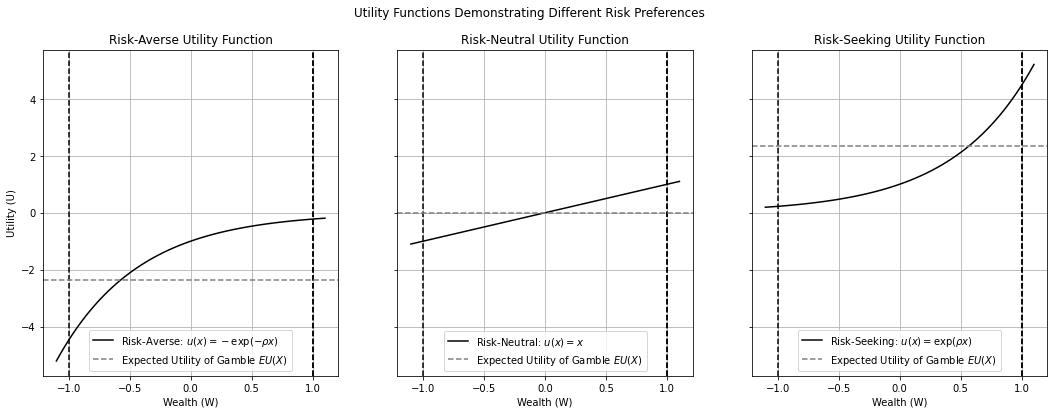

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
RHO = 1.5

# Utility functions
def u_risk_averse(x):
    return -np.exp(-RHO * x)

def u_risk_neutral(x):
    return x

def u_risk_seeking(x):
    return np.exp(RHO * x)

# Values for wealth and utility
x_vals = np.linspace(-1.1, 1.1, 100)
u_risk_averse_vals = u_risk_averse(x_vals)
u_risk_neutral_vals = u_risk_neutral(x_vals)
u_risk_seeking_vals = u_risk_seeking(x_vals)

# Gamble outcomes
x_gamble = [-1, 1]  # Outcomes of the gamble
p_gamble = [0.5, 0.5]  # Probabilities

# Certain outcome for all cases
x_certain = 1

# Expected utility of the gamble
expected_utility_averse = np.sum(np.array(p_gamble) * u_risk_averse(np.array(x_gamble)))
expected_utility_neutral = np.sum(np.array(p_gamble) * u_risk_neutral(np.array(x_gamble)))
expected_utility_seeking = np.sum(np.array(p_gamble) * u_risk_seeking(np.array(x_gamble)))

# Plotting the utility functions side-by-side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Risk-averse plot
ax1.plot(x_vals, u_risk_averse_vals, label=r'Risk-Averse: $u(x) = -\exp(-\rho x)$', color='black')
ax1.axvline(x=x_certain, color='black', linestyle='--')
ax1.axvline(x=x_gamble[0], color='black', linestyle='--')
ax1.axvline(x=x_gamble[1], color='black', linestyle='--')
ax1.axhline(y=expected_utility_averse, color='gray', linestyle='--', label='Expected Utility of Gamble $EU(X)$')
ax1.set_title('Risk-Averse Utility Function')
ax1.set_xlabel('Wealth (W)')
ax1.set_ylabel('Utility (U)')
ax1.legend()
ax1.grid(True)

# Risk-neutral plot
ax2.plot(x_vals, u_risk_neutral_vals, label=r'Risk-Neutral: $u(x) = x$', color='black')
ax2.axvline(x=x_certain, color='black', linestyle='--')
ax2.axvline(x=x_gamble[0], color='black', linestyle='--')
ax2.axvline(x=x_gamble[1], color='black', linestyle='--')
ax2.axhline(y=expected_utility_neutral, color='gray', linestyle='--', label='Expected Utility of Gamble $EU(X)$')
ax2.set_title('Risk-Neutral Utility Function')
ax2.set_xlabel('Wealth (W)')
ax2.legend()
ax2.grid(True)

# Risk-seeking plot
ax3.plot(x_vals, u_risk_seeking_vals, label=r'Risk-Seeking: $u(x) = \exp(\rho x)$', color='black')
ax3.axvline(x=x_certain, color='black', linestyle='--')
ax3.axvline(x=x_gamble[0], color='black', linestyle='--')
ax3.axvline(x=x_gamble[1], color='black', linestyle='--')
ax3.axhline(y=expected_utility_seeking, color='gray', linestyle='--', label='Expected Utility of Gamble $EU(X)$')
ax3.set_title('Risk-Seeking Utility Function')
ax3.set_xlabel('Wealth (W)')
ax3.legend()
ax3.grid(True)

# Show the plot
plt.suptitle('Utility Functions Demonstrating Different Risk Preferences')
plt.show()


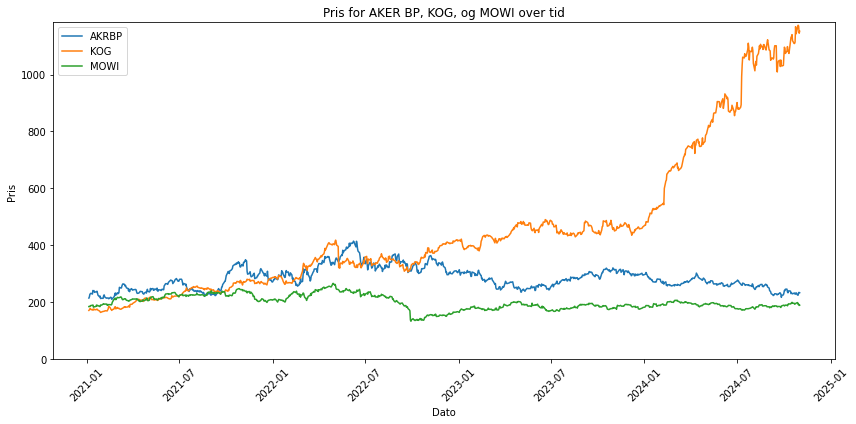

In [9]:
# Ensure the dataframe is loaded and 'Date' column is set
df = pd.read_pickle('output/stocks.df')
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
for symbol in ['AKRBP', 'KOG', 'MOWI']:
    stock_data = df[df['Symbol'] == symbol]
    plt.plot(stock_data['Date'], stock_data['Price'], label=symbol)
# Sett y-aksen til å starte på 0
plt.ylim(0, df['Price'].max() + 10)  # Legger til en liten margin på toppen
# Legg til tittel og etiketter
plt.title('Pris for AKER BP, KOG, og MOWI over tid')
plt.xlabel('Dato')
plt.ylabel('Pris')
plt.legend()
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

KeyError: "'OSEBXLinked' column not found in the dataframe. Available columns are: Index(['Internal code', 'SecurityId', 'CompanyId', 'Symbol', 'ISIN', 'Name',\n       'BestBidPrice', 'BestAskPrice', 'Open', 'High', 'Low', 'Close',\n       'NumberOfTrades', 'Volume', 'Turnover', 'VolumeWeightedAveragePrice',\n       'Price', 'AdjustedPrice', 'Dividends', 'LDividends', 'CorpAdj',\n       'DividendAdj', 'Currency', 'NumberOfShares', 'Exchange', 'NOKPerForex',\n       'mktcap', 'OSEBXmktshare_prevmnth', 'OSEBXAlpha_prevmnth',\n       'OSEBXBeta_prevmnth', 'SMB', 'HML', 'LIQ', 'MOM', 'lnDeltaP',\n       'lnDeltaOSEBX', 'lnDeltaOBX', 'NOWA_DayLnrate', 'bills_3month_Lnrate',\n       'Sector', 'IN_OSEBX', 'Equity', 'Debt', 'Earnings', 'debt_ratio', 'PE',\n       'ID'],\n      dtype='object')"

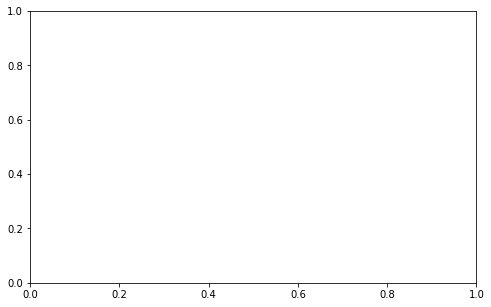

In [10]:
df = pd.read_pickle('output/stocks.df')

# Creating the plot using fig and ax
fig, ax = plt.subplots(figsize=(8, 5))

# Fixing Date, setting index and calculate returns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check if 'OSEBXLinked' column exists
if 'OSEBXLinked' in df.columns:
    df['Returns'] = df['OSEBXLinked'].pct_change()
else:
    raise KeyError("'OSEBXLinked' column not found in the dataframe. Available columns are: {}".format(df.columns))

# Calculate mean and std:
rmean = np.mean(df['Returns'])
rstd = np.std(df['Returns'])

# Define the histogram intervals (dx = 0.01)
dx = 0.002
bins = int((0.2 - (-0.2)) / dx)

# Create the plot
ax.hist(df['Returns'].dropna(), bins=bins, 
        range=(-0.2, 0.2), density=True, 
        edgecolor='k', alpha=0.7)
df = None

# Set x-axis limits
ax.set_xlim(-MAX_MIN, MAX_MIN)


# Prøver å regne ut effiecient frontier

In [ ]:
import pandas as pd
#Query script for MySQL client
import pymysql
con = pymysql.connect(host='titlon.uit.no', 
                    user="abe153@uit.no", 
                    password="PmrtuS38fVM!ySe4npB1i", 
                    database='OSE')  
crsr=con.cursor()
crsr.execute("SET SESSION MAX_EXECUTION_TIME=60000;")
crsr.execute("""
	SELECT  * FROM `OSE`.`equity` 
	WHERE (`ISIN` = 'NO0010345853' OR `ISIN`= 'NO0003043309' OR `ISIN`='NO0003054108') 
	 AND year(`Date`) >= 2021
	ORDER BY `Name`,`Date`
""")
r=crsr.fetchall()
df=pd.DataFrame(list(r), columns=[i[0] for i in crsr.description])
df


#YOU NEED TO BE CONNECTED TO YOUR INSTITUTION VIA VPN,
# OR BE AT THE INSTITUTION, FOR THIS CODE TO WORK

pd.to_pickle(df,'output/stocks.df')


In [ ]:
import numpy as np
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format
df = pd.read_pickle('output/stocks.df')
# Defining annual risk free rate. 
rf = df['NOWA_DayLnrate'].mean()*7

isin_with_first_date = df[df['Date'] == df['Date'].min()]['ISIN'].unique()
isin_with_last_date = df[df['Date'] == df['Date'].max()]['ISIN'].unique()
valid_isins = set(isin_with_first_date).intersection(isin_with_last_date)
df = df[df['ISIN'].isin(valid_isins)]

df['Name (ISIN)'] =df['Name'].str.upper().str.strip() + '(' + df['ISIN'] + ')'

# keeping only the most traded shares
res = (
        df.groupby(['Name (ISIN)'])
        .agg({'Turnover': 'sum'})
        .sort_values(by='Turnover', ascending=False)
)
df = df.merge(res.head(4), on=['Name (ISIN)'], 
                                how='inner')
res.head(4)


,Turnover
Name (ISIN),
AKER BP(NO0010345853),"286,078,377,900.00"
MOWI(NO0003054108),"166,044,325,600.00"
KONGSBERG GRUPPEN(NO0003043309),"80,147,655,090.00"


In [ ]:

def get_matrix(df, field):
    """Converts the df to a matrix df that can 
    be used to calculate the covariance matrix"""
    
    df_unique = df.drop_duplicates(
                                    subset=['Date', 'ISIN'])
    pivot_df = df_unique.pivot(index='Date', 
                                    columns='Symbol', 
                                    values=field)

    pivot_df = pivot_df.dropna()

    # Annualized weekly returns
    df_weekly = pivot_df.resample('W').sum()

    return df_weekly

# Ensure the dataframe is loaded and 'Date' column is set
df = pd.read_pickle('output/stocks.df')
df['Date'] = pd.to_datetime(df['Date'])

#X is a matrix with e
X_df = get_matrix(df, 'lnDeltaP') 
X_df = X_df.sort_index()

X_df

Symbol,AKRBP,KOG,MOWI
Date,,,
2021-01-10,0.07,-0.00,-0.01
2021-01-17,0.01,-0.00,-0.03
2021-01-24,-0.04,-0.01,0.02
2021-01-31,-0.05,-0.04,0.01
2021-02-07,0.01,0.03,0.02
...,...,...,...
2024-10-06,0.09,0.04,0.01
2024-10-13,-0.02,0.01,0.02
2024-10-20,-0.05,0.04,0.01


In [ ]:
# Converting X to a numpy array:
X = np.array(X_df)

# Calculating the covariance
cov_matrix = np.cov(X, rowvar=False)

# Calculating the means vector, and reshaping it to a 
# column vector. 

means = np.mean(X, axis=0).reshape((X.shape[1],1))

In [ ]:
# Ensure means is a column vector
means = np.mean(X, axis=0).reshape((X.shape[1], 1))

ones = np.ones((len(means), 1))

A = (ones.T @ np.linalg.inv(cov_matrix) @ ones).item()

B = (ones.T @ np.linalg.inv(cov_matrix) @ (means - rf * ones)).item()

C = ((means - rf * ones).T @ np.linalg.inv(cov_matrix) @ (means - rf * ones)).item()

def portfolio_front(expected_excess_return, a, b, c):
    r = expected_excess_return
    minimum_variance = (1/a + ((r - abs(b)/a)**2) / (c - b**2/a))
    minimum_volatility = minimum_variance**0.5
    return minimum_volatility

In [ ]:
import pandas as pd

df = pd.read_pickle('output/stocks.df')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df_weekly = df.resample('W').sum()
df_weekly = df_weekly[['SMB', 'HML', 'LIQ', 'MOM']].dropna()
df = df[['SMB', 'HML', 'LIQ', 'MOM']].dropna()
means = df_weekly.mean()*52
std = df_weekly.std()*52**0.5
print(std)
print(means)
df_weekly

SMB   0.39
HML   0.43
LIQ   0.47
MOM   0.49
dtype: float64
SMB    0.12
HML    0.58
LIQ   -0.12
MOM    0.29
dtype: float64


,SMB,HML,LIQ,MOM
Date,,,,
2021-01-10,0.05,0.08,-0.01,0.03
2021-01-17,0.06,-0.09,0.00,-0.13
2021-01-24,0.05,0.08,0.06,0.02
2021-01-31,0.06,-0.01,0.07,-0.12
2021-02-07,-0.11,-0.02,0.01,-0.06
...,...,...,...,...
2024-10-06,-0.03,0.00,0.00,-0.04
2024-10-13,0.00,0.00,0.00,0.00
2024-10-20,0.00,0.00,0.00,0.00


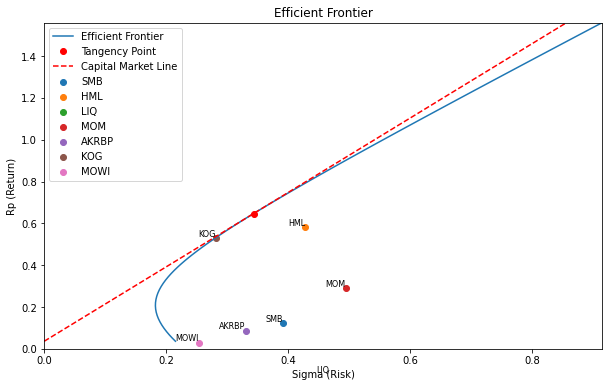

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Opprett plottet
plot_scale = 52
fig, ax = plt.subplots(figsize=(10, 6))
MAX_AXIS = 0.03
colors = plt.get_cmap("tab10")  # Henter fargepaletten 'tab10'

# Beregn risiko og avkastning langs den effektive fronten
rp_values = np.linspace(0, MAX_AXIS - rf, 100)
sigma_values = portfolio_front(rp_values, A, B, C)

# Plot den effektive fronten (Efficient Frontier)
ax.plot(plot_scale**0.5 * sigma_values, plot_scale * (rp_values + rf), label='Efficient Frontier')

# Beregn og plott tangency-punktet for optimal portefølje
tangency_sigma = portfolio_front(C / B, A, B, C)
ax.plot(plot_scale**0.5 * tangency_sigma, plot_scale * (C / B + rf), 'ro', label='Tangency Point')

# Plot kapitalmarkedslinjen (Capital Market Line)
sigma_range = np.linspace(0, np.max(sigma_values), 100)
ax.plot(plot_scale**0.5 * sigma_range, plot_scale * (rf + sigma_range * (C / B) / tangency_sigma), 
        color='r', linestyle='--', label='Capital Market Line')

# Beregn årlig forventet avkastning og standardavvik for hver faktor (SMB, HML, LIQ, MOM)
means_factors = df_weekly[['SMB', 'HML', 'LIQ', 'MOM']].mean(axis=0) * 52
std_factors = df_weekly[['SMB', 'HML', 'LIQ', 'MOM']].std(axis=0) * (52**0.5)

# Plot faktorene SMB, HML, LIQ, og MOM med unike farger
for i, factor in enumerate(means_factors.index):
    ax.scatter(std_factors[factor], means_factors[factor], label=factor, color=colors(i))
    ax.text(std_factors[factor], means_factors[factor], factor, fontsize=8, ha='right', va='bottom')

# Beregn årlig forventet avkastning og standardavvik for aksjene AKRBP, KOG, MOWI
means_stocks = X_df[['AKRBP', 'KOG', 'MOWI']].mean(axis=0) * 52
std_stocks = X_df[['AKRBP', 'KOG', 'MOWI']].std(axis=0) * (52**0.5)

# Plot aksjene AKRBP, KOG, og MOWI med unike farger
for i, stock in enumerate(means_stocks.index, start=4):  # Starter på 4 for å unngå overlapp med faktorene
    ax.scatter(std_stocks[stock], means_stocks[stock], label=stock, color=colors(i))
    ax.text(std_stocks[stock], means_stocks[stock], stock, fontsize=8, ha='right', va='bottom')

# Juster plot-innstillinger og akser
ax.set_xlim([0, np.max(sigma_values * plot_scale**0.5)])
ax.set_ylim([0, (np.max(rp_values) + rf) * plot_scale])
ax.set_xlabel('Sigma (Risk)')
ax.set_ylabel('Rp (Return)')
ax.set_title('Efficient Frontier')
ax.legend()

# Vis plottet
plt.show()


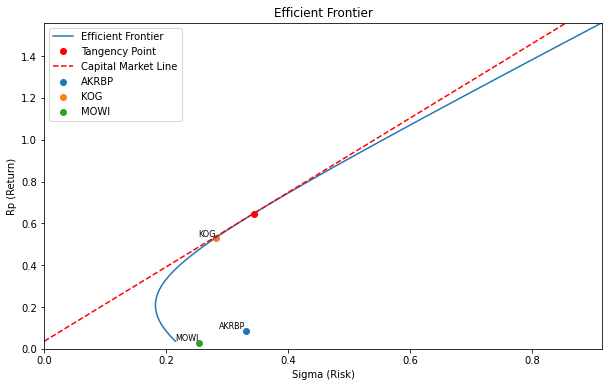

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Opprett plottet
plot_scale = 52
fig, ax = plt.subplots(figsize=(10, 6))

# Beregn risiko og avkastning langs den effektive fronten
rp_values = np.linspace(0, MAX_AXIS - rf, 100)
sigma_values = portfolio_front(rp_values, A, B, C)

# Plot den effektive fronten (Efficient Frontier)
ax.plot(plot_scale**0.5 * sigma_values, plot_scale * (rp_values + rf), label='Efficient Frontier')

# Beregn og plott tangency-punktet for optimal portefølje
tangency_sigma = portfolio_front(C / B, A, B, C)
ax.plot(plot_scale**0.5 * tangency_sigma, plot_scale * (C / B + rf), 'ro', label='Tangency Point')

# Plot kapitalmarkedslinjen (Capital Market Line)
sigma_range = np.linspace(0, np.max(sigma_values), 100)
ax.plot(plot_scale**0.5 * sigma_range, plot_scale * (rf + sigma_range * (C / B) / tangency_sigma), 
        color='r', linestyle='--', label='Capital Market Line')

# Legg til forventet avkastning og standardavvik for hver aksje i datasettet
expected = X_df.mean() * 52                  # Årlig forventet avkastning
std = X_df.std() * (52**0.5)                 # Årlig standardavvik

# Plot aksjer uten "Optimal"
for series in expected.index:
    if series != "Optimal":  # Unngå å plotte "Optimal"
        ax.scatter(std[series], expected[series], label=series)
        ax.text(std[series], expected[series], series, fontsize=8, ha='right', va='bottom')


ax.legend()


# Juster plot-innstillinger og akser
ax.set_xlim([0, np.max(sigma_values * plot_scale**0.5)])
ax.set_ylim([0, (np.max(rp_values) + rf) * plot_scale])
ax.set_xlabel('Sigma (Risk)')
ax.set_ylabel('Rp (Return)')
ax.set_title('Efficient Frontier')
ax.legend()

# Vis plottet
plt.show()


In [ ]:
# Ensure means is a column vector
means = np.mean(X, axis=0).reshape((X.shape[1], 1))

# Calculating the normalized optimal portfolio
opt_port = np.linalg.inv(cov_matrix) @ (means - rf * np.ones_like(means)) / B

# Calculating the returns of the optimal portfolio:
X_df['Optimal'] = X @ opt_port

# Saving the dataframe for later use:
pd.to_pickle(X_df, 'output/X.df')

# Inserting the portfolio into a data frame for display
d = {}
for i in range(len(opt_port)):
    d[X_df.columns[i]] = [f"{np.round(opt_port[i, 0] * 100, 0)}%"]

print("Hence the optimal portfolio in this case is")
pd.DataFrame(d)

Hence the optimal portfolio in this case is


,AKRBP,KOG,MOWI
0,-0.0%,124.0%,-23.0%


### The Normal Distribution and risk

In [ ]:
import pandas as pd
#Query script for MySQL client
import pymysql
con = pymysql.connect(host='titlon.uit.no', 
                    user="abe153@uit.no", 
                    password="lMYCo&dXQum$m%WFyu5TX", 
                    database='OSE')  
crsr=con.cursor()
crsr.execute("SET SESSION MAX_EXECUTION_TIME=60000;")
crsr.execute("""
	SELECT  * FROM `OSE`.`equity` 
	WHERE (`ISIN` = 'NO0010345853' OR `ISIN`= 'NO0003043309' OR `ISIN`='NO0003054108') 
	 AND year(`Date`) >= 2021
	ORDER BY `Name`,`Date`
""")
r=crsr.fetchall()
df=pd.DataFrame(list(r), columns=[i[0] for i in crsr.description])
df


#YOU NEED TO BE CONNECTED TO YOUR INSTITUTION VIA VPN,
# OR BE AT THE INSTITUTION, FOR THIS CODE TO WORK

pd.to_pickle(df,'output/index.df')


/var/folders/qx/w_5ssgp92m97r93_6sq19zy80000gp/T/ipykernel_1503/3724377631.py:11: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df['Returns'] = df['AdjustedPrice'].pct_change().dropna()  # Replace with 'Close' if necessary


ValueError: cannot reindex on an axis with duplicate labels

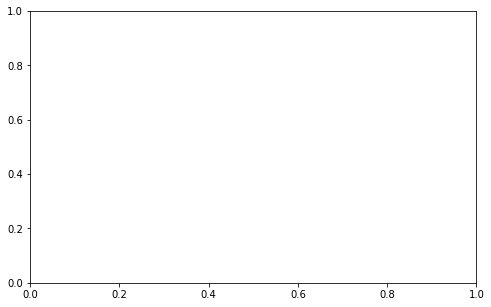

In [ ]:
import pandas as pd
# loading the data
df = pd.read_pickle('output/index.df')

# Creating the plot using fig and ax
fig, ax = plt.subplots(figsize=(8, 5))

#fixing Date, setting index and calculate returns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Returns'] = df['AdjustedPrice'].pct_change().dropna()  # Replace with 'Close' if necessary

#Calculate mean and std:
rmean = np.mean(df['Returns'])
rstd = np.std(df['Returns'])

# Define the histogram intervals (dx = 0.01)
dx = 0.002
bins = int((0.2 - (-0.2)) / dx)

# Create the plot
ax.hist(df['Returns'].dropna(), bins=bins, 
        range=(-0.2, 0.2), density=True, 
        edgecolor='k', alpha=0.7)
df = None

# Set x-axis limits
ax.set_xlim(-MAX_MIN, MAX_MIN)

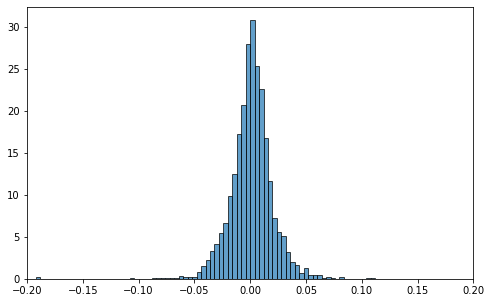

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the data
df = pd.read_pickle('output/index.df')

# Creating the plot using fig and ax
fig, ax = plt.subplots(figsize=(8, 5))

# Converting Date to datetime, setting index, and calculating returns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Returns'] = df['AdjustedPrice'].pct_change()  # Replace with 'Close' if necessary

# Calculate mean and standard deviation of returns
rmean = np.mean(df['Returns'].dropna())
rstd = np.std(df['Returns'].dropna())

# Define the histogram intervals (dx = 0.002)
dx = 0.004
bins = int((0.2 - (-0.2)) / dx)

# Define MAX_MIN for x-axis limits
MAX_MIN = 0.2

# Create the histogram of returns
ax.hist(df['Returns'].dropna(), bins=bins, 
        range=(-0.2, 0.2), density=True, 
        edgecolor='k', alpha=0.7)

# Set x-axis limits
ax.set_xlim(-MAX_MIN, MAX_MIN)

# Display the plot
plt.show()


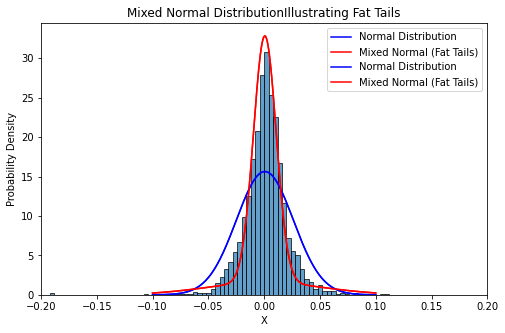

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#Defining the range of x-values:
MAX_MIN = 0.1
x_vals = np.linspace(-MAX_MIN, MAX_MIN, 1000)

# Calculate normal dist and the mixed normal dist:
norm_dist    =     norm.pdf(x_vals, loc=rmean, scale=rstd)
fat_tails = (0.8 * norm.pdf(x_vals, loc=rmean, scale=rstd*0.4) + 
             0.2 * norm.pdf(x_vals, loc=rmean, scale=rstd*2))

# Plotting normal dist and mixed normal dist
ax.plot(x_vals, norm_dist, 
            label="Normal Distribution", color='blue')
ax.plot(x_vals, fat_tails, 
            label="Mixed Normal (Fat Tails)", color='red')

# Set title, labels and legend
ax.set_title('Mixed Normal Distribution' 
                'Illustrating Fat Tails')
ax.set_xlabel('X')
ax.set_ylabel('Probability Density')
ax.legend()
fig

### Value at Risk (VaR)

In [ ]:
import matplotlib.pyplot as plt
def evaluate(plt, d95, d99, ret, dates, heading):
    # Clear the plot area to avoid overlapping plots
    plt.cla()

    # Plot the 95% VaR, 99% VaR, and actual returns
    plt.plot(dates, d95, label='95% Confidence Level')
    plt.plot(dates, d99, label='99% Confidence Level')
    plt.plot(dates, ret, label='Actual Return')

    # Highlight instances where returns breach the 95% VaR
    maxret = max(ret)
    breaches_95 = [maxret if d > r else 0 for d, r in zip(d95, ret)]
    plt.bar(dates, breaches_95, color='gray', alpha=0.5, width=0.5, label='Breaches 95% VaR')

    # Set labels and title
    plt.ylabel('VaR')
    plt.xlabel('Date')
    plt.title(heading)
    plt.xticks(rotation=90)
    plt.legend(loc="lower right")
    plt.subplots_adjust(bottom=0.15)
    plt.show()

    # Calculate and print the breach percentage for each confidence level
    backtest_results = [np.round(sum(d > ret) / len(ret) * 100, 1) for d in [d95, d99]]

    for i, level in enumerate([95, 99]):
        breaches = sum([d95, d99][i] > ret)
        print(f"{heading} with {level}% confidence interval:\n"
              f"Breaches: {breaches}\n"
              f"Backtesting (Realized VaR - % breaches): {backtest_results[i]}%\n")

In [ ]:
PVALS = [0.05, 0.01]  # Confidence intervals (95% and 99%)
from scipy.stats import norm

def normal_est(x, sigmalist):
    z = norm.ppf(PVALS)  # Z-scores for the specified confidence levels
    sigma = np.std(x, ddof=1)  # Sample standard deviation
    return z[0] * sigma, z[1] * sigma, sigma

def historical_est(x, sigmalist):
    q95 = abs(np.quantile(x, PVALS[0]))  # 95th percentile of historical losses
    q99 = abs(np.quantile(x, PVALS[1]))  # 99th percentile of historical losses
    return -q95, -q99, None  # VaR values are negative to indicate potential loss

def last_volat(x, sigmalist):
    x = np.array(x)
    z = norm.ppf(PVALS)
    if not sigmalist:  # If sigmalist is empty, use initial standard deviation
        sigma = np.std(x, ddof=1)
    else:  # Update sigma based on past volatility and recent error
        sigma = (0.1 * (x[0] - np.mean(x))**2 + 0.9 * sigmalist[-1]**2)**0.5
    return z[0] * sigma, z[1] * sigma, sigma

In [ ]:
NAME = 'MOWI'
ESTIMATION_WINSIZE = 52

df = pd.read_pickle('output/X.df')


(normal95, normal99, 
 sigma, dates, ret )= generate_backtest(normal_est, 
        df, NAME, ESTIMATION_WINSIZE)
evaluate(plt, normal95, normal99, ret, dates,
         'VaR: Normal Distribution Mowi')

NameError: name 'generate_backtest' is not defined

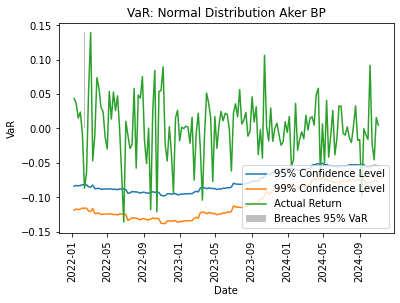

VaR: Normal Distribution Aker BP with 95% confidence interval:
Breaches: 7
Backtesting (Realized VaR - % breaches): 4.7%

VaR: Normal Distribution Aker BP with 99% confidence interval:
Breaches: 2
Backtesting (Realized VaR - % breaches): 1.4%



In [ ]:
NAME = 'AKRBP'
ESTIMATION_WINSIZE = 52

df = pd.read_pickle('output/X.df')


(normal95, normal99, 
 sigma, dates, ret )= generate_backtest(normal_est, 
        df, NAME, ESTIMATION_WINSIZE)
evaluate(plt, normal95, normal99, ret, dates,
         'VaR: Normal Distribution Aker BP')

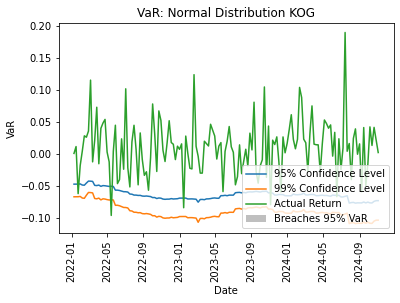

VaR: Normal Distribution KOG with 95% confidence interval:
Breaches: 5
Backtesting (Realized VaR - % breaches): 3.4%

VaR: Normal Distribution KOG with 99% confidence interval:
Breaches: 1
Backtesting (Realized VaR - % breaches): 0.7%



In [ ]:
NAME = 'KOG'
ESTIMATION_WINSIZE = 52

df = pd.read_pickle('output/X.df')


(normal95, normal99, 
 sigma, dates, ret )= generate_backtest(normal_est, 
        df, NAME, ESTIMATION_WINSIZE)
evaluate(plt, normal95, normal99, ret, dates,
         'VaR: Normal Distribution KOG')

## Multifactor regression model

In [ ]:
import pandas as pd
# reads the data
df_stocks = pd.read_pickle('output/stocks.df')



# reducding the sample by foccusing on a few stocks of interest
df_stocks = df_stocks[df_stocks['Symbol'].isin(['AKRBP','KOG','','MOWI'])]

# we capture the ISIN-ticker combinations for later use, to associate stocks with tickers
# We need to use the ISIN in what's follows, because ticker is not a reliable identifier
df_isin_symbol =  df_stocks[['ISIN','Symbol']].drop_duplicates()

# choosing relevant columns
df_stocks = df_stocks[['Symbol', 'Date', 'lnDeltaP', 
                'lnDeltaOSEBX',  'SMB', 'HML', 
                'LIQ', 'MOM', 'NOWA_DayLnrate']]

# defines the indicies
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
df_stocks = df_stocks.set_index(['Symbol', 'Date'])

# making sure the index is unique and remove nans
df_stocks = df_stocks[~df_stocks.index.duplicated(keep='first')]
df_stocks = df_stocks.dropna(subset=['SMB'])

# Define excess return of stocks and market index
df_stocks['lnDeltaP_rf'] = (df_stocks['lnDeltaP'] 
                                - df_stocks['NOWA_DayLnrate'])
df_stocks['lnDeltaOSEBX_rf'] = (df_stocks['lnDeltaOSEBX'] 
                                - df_stocks['NOWA_DayLnrate'])

# Creating weekly observations
df_stocks_w = df_stocks.groupby('Symbol').resample('W', level='Date').sum()
df_stocks_w

lnDeltaP  lnDeltaOSEBX   SMB   HML   LIQ   MOM  \
Symbol Date                                                         
AKRBP  2021-01-10      0.08          0.04  0.02  0.03 -0.00  0.01   
       2021-01-17      0.01         -0.01  0.02 -0.03  0.00 -0.04   
       2021-01-24     -0.04          0.01  0.02  0.03  0.02  0.01   
       2021-01-31     -0.05         -0.03  0.02 -0.00  0.02 -0.04   
       2021-02-07      0.01          0.03 -0.04 -0.01  0.00 -0.02   
...                     ...           ...   ...   ...   ...   ...   
MOWI   2024-09-08     -0.02         -0.04  0.02  0.00  0.02  0.03   
       2024-09-15      0.03          0.02 -0.02  0.00 -0.00 -0.01   
       2024-09-22     -0.01          0.00 -0.01  0.00 -0.03  0.01   
       2024-09-29      0.01         -0.00 -0.01  0.00 -0.01  0.03   
       2024-10-06      0.01          0.01 -0.01  0.00  0.00 -0.01   

                   NOWA_DayLnrate  lnDeltaP_rf  lnDeltaOSEBX_rf  
Symbol Date                                                      
AKRBP  2021-01-10           -0.00         0.08             0.04  
       2021-01-17            0.00         0.01            -0.01  
       2021-01-24            0.00        -0.04             0.01  
       2021-01-31            0.00        -0.05            -0.03  
       2021-02-07            0.00         0.01             0.03  
...                           ...          ...              ...  
MOWI   2024-09-08            0.00        -0.02            -0.04  
       2024-09-15            0.00         0.03             0.01  
       2024-09-22            0.00        -0.01            -0.00  
       2024-09-29            0.00         0.01            -0.00  
       2024-10-06            0.00         0.01             0.01  

[588 rows x 9 columns]

In [ ]:
import statsmodels.api as sm

# Filter the DataFrame for Symbol = 'AKRBP'
df_reg = df_stocks_w.loc['AKRBP']

# Define the independent variables (features) and dependent variable (target)
X = df_reg[['lnDeltaOSEBX_rf', 'SMB', 'HML', 'LIQ', 'MOM']]
y = df_reg['lnDeltaP_rf']

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(y, X).fit()

# Display the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            lnDeltaP_rf   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     33.26
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           2.66e-24
Time:                        10:11:00   Log-Likelihood:                 389.35
No. Observations:                 196   AIC:                            -766.7
Df Residuals:                     190   BIC:                            -747.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0001      0.002     

In [ ]:
import statsmodels.api as sm

# Filter the DataFrame for Symbol = 'MOWI'
df_reg = df_stocks_w.loc['MOWI']

# Define the independent variables (features) and dependent variable (target)
X = df_reg[['lnDeltaOSEBX_rf', 'SMB', 'HML', 'LIQ', 'MOM']]
y = df_reg['lnDeltaP_rf']

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(y, X).fit()

# Display the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            lnDeltaP_rf   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     9.636
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           3.25e-08
Time:                        10:12:25   Log-Likelihood:                 399.81
No. Observations:                 196   AIC:                            -787.6
Df Residuals:                     190   BIC:                            -768.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0006      0.002     

In [ ]:
import statsmodels.api as sm

# Filter the DataFrame for Symbol = 'KOG'
df_reg = df_stocks_w.loc['KOG']

# Define the independent variables (features) and dependent variable (target)
X = df_reg[['lnDeltaOSEBX_rf', 'SMB', 'HML', 'LIQ', 'MOM']]
y = df_reg['lnDeltaP_rf']

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(y, X).fit()

# Display the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            lnDeltaP_rf   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     4.866
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           0.000327
Time:                        10:12:26   Log-Likelihood:                 370.44
No. Observations:                 196   AIC:                            -728.9
Df Residuals:                     190   BIC:                            -709.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0072      0.003     

### Bibliografi

Koder hentet fra:

- Sirnes, E. (2024a, september 18). 2 — Utility and investor types. https://uit-sok-3011-h24.github.io/finans/2-expectation_utility.html

- Sirnes, E. (2024b, september 18). 3 — Matrices, Optimal Portfolios. https://uit-sok-3011-h24.github.io/finans/3-lecture_optport.html

- Sirnes, E. (2024c, oktober 30). 4 — Factors. https://uit-sok-3011-h24.github.io/finans/4-lecture_factors.html

- Sirnes, E. (2024d, oktober 30). 5 — Value at Risk (VaR). https://uit-sok-3011-h24.github.io/finans/5-lecture_VaR.html